In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
from torch.optim.lr_scheduler import OneCycleLR
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Modular Code Imports

In [2]:
from data_augmentation import normalize_calculation,data_augmentation
from data_loader import data_download, data_loading
from visualize import class_image, show_misclassified_img, show_accuracy_loss
from helper import model_summary
from model import Net,train,test
import model

# Selecting the device type

In [3]:
SEED = 1
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
# For reproducibility
torch.manual_seed(SEED)
if cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


# Data Augmentation

In [4]:
mean,std = normalize_calculation(datasets.CIFAR10)
print("Mean - ", mean,"  ","Standard Deviation - ",std)

Files already downloaded and verified
Mean -  [0.49139968 0.48215841 0.44653091]    Standard Deviation -  [0.24703223 0.24348513 0.26158784]


In [5]:
train_transforms, test_transforms = data_augmentation(mean, std)

# Loading and Transforming the train/test data using data loader

In [6]:
train_data, test_data, classes = data_download(train_transforms, test_transforms)

Files already downloaded and verified
Files already downloaded and verified
Unique classes of images are: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [7]:
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=128)
train_loader, test_loader = data_loading(train_data, test_data,dataloader_args)

# Images from each class in the CIFAR10 dataset

In [8]:
#class_image(train_data,classes)

# Setting GPU as device and model calling

In [9]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
model_summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 30, 30]           4,608
              ReLU-6           [-1, 32, 30, 30]               0
       BatchNorm2d-7           [-1, 32, 30, 30]              64
           Dropout-8           [-1, 32, 30, 30]               0
            Conv2d-9           [-1, 64, 28, 28]          18,432
             ReLU-10           [-1, 64, 28, 28]               0
      BatchNorm2d-11           [-1, 64, 28, 28]             128
          Dropout-12           [-1, 64, 28, 28]               0
           Conv2d-13           [-1, 64, 13, 13]          36,864
             ReLU-14           [-1, 64,

# Model Training and Testing

In [10]:
train_acc, train_losses, test_acc, test_losses= [], [], [], []
EPOCHS = 100
optimizer = optim.Adam(model.parameters(), lr = 0.01, weight_decay=1e-5)
scheduler = OneCycleLR(optimizer, max_lr = 0.015, epochs = EPOCHS, steps_per_epoch = len(train_loader))
criterion = nn.CrossEntropyLoss()

for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    train(model, device, train_loader, train_acc, train_losses, optimizer, scheduler, criterion)
    missed_images, missed_labels, missed_predictions = test(model, device, test_loader, test_acc, test_losses, criterion)

EPOCH: 1


Loss=1.5531632900238037 Batch_id=390 Accuracy=39.20: 100%|██████████| 391/391 [00:22<00:00, 17.14it/s]



Test set: Average loss: 0.0103, Accuracy: 5331/10000 (53.31%)

EPOCH: 2


Loss=1.28281569480896 Batch_id=390 Accuracy=51.42: 100%|██████████| 391/391 [00:22<00:00, 17.54it/s]



Test set: Average loss: 0.0086, Accuracy: 6054/10000 (60.54%)

EPOCH: 3


Loss=1.2129738330841064 Batch_id=390 Accuracy=56.01: 100%|██████████| 391/391 [00:22<00:00, 17.52it/s]



Test set: Average loss: 0.0078, Accuracy: 6528/10000 (65.28%)

EPOCH: 4


Loss=1.3539377450942993 Batch_id=390 Accuracy=58.99: 100%|██████████| 391/391 [00:22<00:00, 17.11it/s]



Test set: Average loss: 0.0076, Accuracy: 6590/10000 (65.90%)

EPOCH: 5


Loss=1.0384457111358643 Batch_id=390 Accuracy=60.66: 100%|██████████| 391/391 [00:20<00:00, 18.77it/s]



Test set: Average loss: 0.0071, Accuracy: 6834/10000 (68.34%)

EPOCH: 6


Loss=1.0113567113876343 Batch_id=390 Accuracy=62.62: 100%|██████████| 391/391 [00:20<00:00, 19.06it/s]



Test set: Average loss: 0.0068, Accuracy: 6888/10000 (68.88%)

EPOCH: 7


Loss=1.0294318199157715 Batch_id=390 Accuracy=63.51: 100%|██████████| 391/391 [00:21<00:00, 18.03it/s]



Test set: Average loss: 0.0062, Accuracy: 7299/10000 (72.99%)

EPOCH: 8


Loss=1.1319397687911987 Batch_id=390 Accuracy=64.51: 100%|██████████| 391/391 [00:21<00:00, 17.87it/s]



Test set: Average loss: 0.0063, Accuracy: 7288/10000 (72.88%)

EPOCH: 9


Loss=1.131197452545166 Batch_id=390 Accuracy=65.09: 100%|██████████| 391/391 [00:21<00:00, 18.51it/s]



Test set: Average loss: 0.0062, Accuracy: 7333/10000 (73.33%)

EPOCH: 10


Loss=1.129042387008667 Batch_id=390 Accuracy=65.66: 100%|██████████| 391/391 [00:21<00:00, 18.27it/s]



Test set: Average loss: 0.0064, Accuracy: 7226/10000 (72.26%)

EPOCH: 11


Loss=1.0685608386993408 Batch_id=390 Accuracy=66.81: 100%|██████████| 391/391 [00:21<00:00, 18.10it/s]



Test set: Average loss: 0.0058, Accuracy: 7506/10000 (75.06%)

EPOCH: 12


Loss=0.9197486639022827 Batch_id=390 Accuracy=66.98: 100%|██████████| 391/391 [00:22<00:00, 17.73it/s]



Test set: Average loss: 0.0064, Accuracy: 7270/10000 (72.70%)

EPOCH: 13


Loss=1.1471501588821411 Batch_id=390 Accuracy=67.54: 100%|██████████| 391/391 [00:22<00:00, 17.71it/s]



Test set: Average loss: 0.0056, Accuracy: 7619/10000 (76.19%)

EPOCH: 14


Loss=0.9363238215446472 Batch_id=390 Accuracy=68.08: 100%|██████████| 391/391 [00:21<00:00, 18.34it/s]



Test set: Average loss: 0.0055, Accuracy: 7642/10000 (76.42%)

EPOCH: 15


Loss=0.9079523086547852 Batch_id=390 Accuracy=68.40: 100%|██████████| 391/391 [00:20<00:00, 18.69it/s]



Test set: Average loss: 0.0059, Accuracy: 7498/10000 (74.98%)

EPOCH: 16


Loss=0.9652242660522461 Batch_id=390 Accuracy=69.01: 100%|██████████| 391/391 [00:21<00:00, 18.36it/s]



Test set: Average loss: 0.0053, Accuracy: 7713/10000 (77.13%)

EPOCH: 17


Loss=0.760948896408081 Batch_id=390 Accuracy=69.19: 100%|██████████| 391/391 [00:22<00:00, 17.57it/s]



Test set: Average loss: 0.0055, Accuracy: 7655/10000 (76.55%)

EPOCH: 18


Loss=0.9099551439285278 Batch_id=390 Accuracy=69.33: 100%|██████████| 391/391 [00:22<00:00, 17.77it/s]



Test set: Average loss: 0.0054, Accuracy: 7636/10000 (76.36%)

EPOCH: 19


Loss=1.0128815174102783 Batch_id=390 Accuracy=69.49: 100%|██████████| 391/391 [00:20<00:00, 18.79it/s]



Test set: Average loss: 0.0050, Accuracy: 7821/10000 (78.21%)

EPOCH: 20


Loss=0.7802087068557739 Batch_id=390 Accuracy=70.08: 100%|██████████| 391/391 [00:20<00:00, 18.67it/s]



Test set: Average loss: 0.0055, Accuracy: 7646/10000 (76.46%)

EPOCH: 21


Loss=0.962164044380188 Batch_id=390 Accuracy=69.73: 100%|██████████| 391/391 [00:23<00:00, 16.33it/s]



Test set: Average loss: 0.0050, Accuracy: 7767/10000 (77.67%)

EPOCH: 22


Loss=0.9017642140388489 Batch_id=390 Accuracy=70.35: 100%|██████████| 391/391 [00:22<00:00, 17.70it/s]



Test set: Average loss: 0.0048, Accuracy: 7907/10000 (79.07%)

EPOCH: 23


Loss=0.9559007883071899 Batch_id=390 Accuracy=70.76: 100%|██████████| 391/391 [00:21<00:00, 17.84it/s]



Test set: Average loss: 0.0048, Accuracy: 7942/10000 (79.42%)

EPOCH: 24


Loss=0.9057329297065735 Batch_id=390 Accuracy=70.50: 100%|██████████| 391/391 [00:20<00:00, 19.00it/s]



Test set: Average loss: 0.0049, Accuracy: 7838/10000 (78.38%)

EPOCH: 25


Loss=0.7364867925643921 Batch_id=390 Accuracy=70.84: 100%|██████████| 391/391 [00:21<00:00, 18.62it/s]



Test set: Average loss: 0.0052, Accuracy: 7770/10000 (77.70%)

EPOCH: 26


Loss=1.0342663526535034 Batch_id=390 Accuracy=70.56: 100%|██████████| 391/391 [00:22<00:00, 17.70it/s]



Test set: Average loss: 0.0049, Accuracy: 7918/10000 (79.18%)

EPOCH: 27


Loss=0.835205078125 Batch_id=390 Accuracy=71.01: 100%|██████████| 391/391 [00:22<00:00, 17.77it/s]



Test set: Average loss: 0.0052, Accuracy: 7805/10000 (78.05%)

EPOCH: 28


Loss=1.0152324438095093 Batch_id=390 Accuracy=70.96: 100%|██████████| 391/391 [00:20<00:00, 18.68it/s]



Test set: Average loss: 0.0051, Accuracy: 7799/10000 (77.99%)

EPOCH: 29


Loss=0.8969658017158508 Batch_id=390 Accuracy=71.21: 100%|██████████| 391/391 [00:20<00:00, 18.81it/s]



Test set: Average loss: 0.0051, Accuracy: 7850/10000 (78.50%)

EPOCH: 30


Loss=0.7825326919555664 Batch_id=390 Accuracy=71.49: 100%|██████████| 391/391 [00:21<00:00, 18.34it/s]



Test set: Average loss: 0.0048, Accuracy: 7965/10000 (79.65%)

EPOCH: 31


Loss=0.7856225967407227 Batch_id=390 Accuracy=71.58: 100%|██████████| 391/391 [00:22<00:00, 17.63it/s]



Test set: Average loss: 0.0049, Accuracy: 7848/10000 (78.48%)

EPOCH: 32


Loss=0.6135531663894653 Batch_id=390 Accuracy=71.37: 100%|██████████| 391/391 [00:21<00:00, 17.82it/s]



Test set: Average loss: 0.0050, Accuracy: 7858/10000 (78.58%)

EPOCH: 33


Loss=0.8098810315132141 Batch_id=390 Accuracy=71.78: 100%|██████████| 391/391 [00:20<00:00, 18.77it/s]



Test set: Average loss: 0.0050, Accuracy: 7862/10000 (78.62%)

EPOCH: 34


Loss=0.7225074172019958 Batch_id=390 Accuracy=71.92: 100%|██████████| 391/391 [00:20<00:00, 18.84it/s]



Test set: Average loss: 0.0047, Accuracy: 7937/10000 (79.37%)

EPOCH: 35


Loss=0.7639008164405823 Batch_id=390 Accuracy=72.25: 100%|██████████| 391/391 [00:22<00:00, 17.63it/s]



Test set: Average loss: 0.0045, Accuracy: 8073/10000 (80.73%)

EPOCH: 36


Loss=0.5662859678268433 Batch_id=390 Accuracy=72.20: 100%|██████████| 391/391 [00:22<00:00, 17.72it/s]



Test set: Average loss: 0.0050, Accuracy: 7891/10000 (78.91%)

EPOCH: 37


Loss=0.722066342830658 Batch_id=390 Accuracy=72.44: 100%|██████████| 391/391 [00:21<00:00, 18.52it/s]



Test set: Average loss: 0.0053, Accuracy: 7831/10000 (78.31%)

EPOCH: 38


Loss=0.7025895118713379 Batch_id=390 Accuracy=72.52: 100%|██████████| 391/391 [00:21<00:00, 18.61it/s]



Test set: Average loss: 0.0049, Accuracy: 7907/10000 (79.07%)

EPOCH: 39


Loss=0.6721819639205933 Batch_id=390 Accuracy=72.82: 100%|██████████| 391/391 [00:21<00:00, 18.35it/s]



Test set: Average loss: 0.0047, Accuracy: 8000/10000 (80.00%)

EPOCH: 40


Loss=0.8150988817214966 Batch_id=390 Accuracy=72.60: 100%|██████████| 391/391 [00:22<00:00, 17.19it/s]



Test set: Average loss: 0.0045, Accuracy: 8043/10000 (80.43%)

EPOCH: 41


Loss=0.7286441922187805 Batch_id=390 Accuracy=73.02: 100%|██████████| 391/391 [00:22<00:00, 17.22it/s]



Test set: Average loss: 0.0046, Accuracy: 8029/10000 (80.29%)

EPOCH: 42


Loss=0.7282305955886841 Batch_id=390 Accuracy=72.95: 100%|██████████| 391/391 [00:21<00:00, 18.61it/s]



Test set: Average loss: 0.0045, Accuracy: 8081/10000 (80.81%)

EPOCH: 43


Loss=0.573614239692688 Batch_id=390 Accuracy=73.17: 100%|██████████| 391/391 [00:20<00:00, 18.70it/s]



Test set: Average loss: 0.0047, Accuracy: 8041/10000 (80.41%)

EPOCH: 44


Loss=0.6928421854972839 Batch_id=390 Accuracy=73.29: 100%|██████████| 391/391 [00:21<00:00, 18.06it/s]



Test set: Average loss: 0.0044, Accuracy: 8119/10000 (81.19%)

EPOCH: 45


Loss=0.8023465871810913 Batch_id=390 Accuracy=73.46: 100%|██████████| 391/391 [00:22<00:00, 17.42it/s]



Test set: Average loss: 0.0043, Accuracy: 8178/10000 (81.78%)

EPOCH: 46


Loss=0.7543785572052002 Batch_id=390 Accuracy=73.70: 100%|██████████| 391/391 [00:22<00:00, 17.59it/s]



Test set: Average loss: 0.0044, Accuracy: 8129/10000 (81.29%)

EPOCH: 47


Loss=0.6195002794265747 Batch_id=390 Accuracy=73.93: 100%|██████████| 391/391 [00:21<00:00, 18.39it/s]



Test set: Average loss: 0.0040, Accuracy: 8272/10000 (82.72%)

EPOCH: 48


Loss=0.7991483211517334 Batch_id=390 Accuracy=73.80: 100%|██████████| 391/391 [00:21<00:00, 18.42it/s]



Test set: Average loss: 0.0043, Accuracy: 8147/10000 (81.47%)

EPOCH: 49


Loss=0.760410726070404 Batch_id=390 Accuracy=74.21: 100%|██████████| 391/391 [00:21<00:00, 17.84it/s]



Test set: Average loss: 0.0041, Accuracy: 8226/10000 (82.26%)

EPOCH: 50


Loss=0.8127638101577759 Batch_id=390 Accuracy=74.66: 100%|██████████| 391/391 [00:21<00:00, 17.79it/s]



Test set: Average loss: 0.0046, Accuracy: 8076/10000 (80.76%)

EPOCH: 51


Loss=0.8777400255203247 Batch_id=390 Accuracy=74.65: 100%|██████████| 391/391 [00:21<00:00, 18.21it/s]



Test set: Average loss: 0.0042, Accuracy: 8214/10000 (82.14%)

EPOCH: 52


Loss=0.6903843879699707 Batch_id=390 Accuracy=74.51: 100%|██████████| 391/391 [00:21<00:00, 18.60it/s]



Test set: Average loss: 0.0041, Accuracy: 8248/10000 (82.48%)

EPOCH: 53


Loss=0.7325760126113892 Batch_id=390 Accuracy=74.96: 100%|██████████| 391/391 [00:21<00:00, 18.20it/s]



Test set: Average loss: 0.0040, Accuracy: 8213/10000 (82.13%)

EPOCH: 54


Loss=0.7171652317047119 Batch_id=390 Accuracy=75.18: 100%|██████████| 391/391 [00:22<00:00, 17.67it/s]



Test set: Average loss: 0.0043, Accuracy: 8181/10000 (81.81%)

EPOCH: 55


Loss=0.8022700548171997 Batch_id=390 Accuracy=75.17: 100%|██████████| 391/391 [00:21<00:00, 18.19it/s]



Test set: Average loss: 0.0040, Accuracy: 8297/10000 (82.97%)

EPOCH: 56


Loss=0.60450679063797 Batch_id=390 Accuracy=75.36: 100%|██████████| 391/391 [00:20<00:00, 19.01it/s]



Test set: Average loss: 0.0040, Accuracy: 8316/10000 (83.16%)

EPOCH: 57


Loss=0.6327340602874756 Batch_id=390 Accuracy=75.83: 100%|██████████| 391/391 [00:21<00:00, 18.45it/s]



Test set: Average loss: 0.0040, Accuracy: 8303/10000 (83.03%)

EPOCH: 58


Loss=0.6079310774803162 Batch_id=390 Accuracy=75.79: 100%|██████████| 391/391 [00:22<00:00, 17.39it/s]



Test set: Average loss: 0.0037, Accuracy: 8432/10000 (84.32%)

EPOCH: 59


Loss=0.668922483921051 Batch_id=390 Accuracy=76.23: 100%|██████████| 391/391 [00:22<00:00, 17.47it/s]



Test set: Average loss: 0.0038, Accuracy: 8409/10000 (84.09%)

EPOCH: 60


Loss=0.671620786190033 Batch_id=390 Accuracy=76.41: 100%|██████████| 391/391 [00:20<00:00, 18.67it/s]



Test set: Average loss: 0.0038, Accuracy: 8409/10000 (84.09%)

EPOCH: 61


Loss=0.7455915808677673 Batch_id=390 Accuracy=76.16: 100%|██████████| 391/391 [00:21<00:00, 18.34it/s]



Test set: Average loss: 0.0037, Accuracy: 8411/10000 (84.11%)

EPOCH: 62


Loss=0.625038206577301 Batch_id=390 Accuracy=76.65: 100%|██████████| 391/391 [00:22<00:00, 17.54it/s]



Test set: Average loss: 0.0039, Accuracy: 8350/10000 (83.50%)

EPOCH: 63


Loss=0.642417311668396 Batch_id=390 Accuracy=76.87: 100%|██████████| 391/391 [00:22<00:00, 17.55it/s]



Test set: Average loss: 0.0038, Accuracy: 8370/10000 (83.70%)

EPOCH: 64


Loss=0.7290388345718384 Batch_id=390 Accuracy=77.15: 100%|██████████| 391/391 [00:21<00:00, 18.20it/s]



Test set: Average loss: 0.0036, Accuracy: 8444/10000 (84.44%)

EPOCH: 65


Loss=0.57587730884552 Batch_id=390 Accuracy=77.64: 100%|██████████| 391/391 [00:21<00:00, 18.54it/s]



Test set: Average loss: 0.0036, Accuracy: 8421/10000 (84.21%)

EPOCH: 66


Loss=0.546001672744751 Batch_id=390 Accuracy=77.66: 100%|██████████| 391/391 [00:21<00:00, 18.57it/s]



Test set: Average loss: 0.0035, Accuracy: 8514/10000 (85.14%)

EPOCH: 67


Loss=0.7860480546951294 Batch_id=390 Accuracy=77.88: 100%|██████████| 391/391 [00:22<00:00, 17.67it/s]



Test set: Average loss: 0.0037, Accuracy: 8428/10000 (84.28%)

EPOCH: 68


Loss=0.8304595947265625 Batch_id=390 Accuracy=78.00: 100%|██████████| 391/391 [00:22<00:00, 17.52it/s]



Test set: Average loss: 0.0035, Accuracy: 8556/10000 (85.56%)

EPOCH: 69


Loss=0.41816091537475586 Batch_id=390 Accuracy=78.61: 100%|██████████| 391/391 [00:21<00:00, 18.55it/s]



Test set: Average loss: 0.0035, Accuracy: 8531/10000 (85.31%)

EPOCH: 70


Loss=0.37579289078712463 Batch_id=390 Accuracy=78.63: 100%|██████████| 391/391 [00:21<00:00, 18.56it/s]



Test set: Average loss: 0.0035, Accuracy: 8505/10000 (85.05%)

EPOCH: 71


Loss=0.6074438095092773 Batch_id=390 Accuracy=78.71: 100%|██████████| 391/391 [00:21<00:00, 17.84it/s]



Test set: Average loss: 0.0034, Accuracy: 8560/10000 (85.60%)

EPOCH: 72


Loss=0.8565513491630554 Batch_id=390 Accuracy=79.27: 100%|██████████| 391/391 [00:22<00:00, 17.37it/s]



Test set: Average loss: 0.0033, Accuracy: 8597/10000 (85.97%)

EPOCH: 73


Loss=0.5275697708129883 Batch_id=390 Accuracy=79.55: 100%|██████████| 391/391 [00:22<00:00, 17.49it/s]



Test set: Average loss: 0.0032, Accuracy: 8626/10000 (86.26%)

EPOCH: 74


Loss=0.5380673408508301 Batch_id=390 Accuracy=79.94: 100%|██████████| 391/391 [00:21<00:00, 18.39it/s]



Test set: Average loss: 0.0031, Accuracy: 8674/10000 (86.74%)

EPOCH: 75


Loss=0.7614117860794067 Batch_id=390 Accuracy=79.96: 100%|██████████| 391/391 [00:21<00:00, 17.90it/s]



Test set: Average loss: 0.0031, Accuracy: 8661/10000 (86.61%)

EPOCH: 76


Loss=0.747134804725647 Batch_id=390 Accuracy=80.12: 100%|██████████| 391/391 [00:21<00:00, 18.50it/s]



Test set: Average loss: 0.0032, Accuracy: 8641/10000 (86.41%)

EPOCH: 77


Loss=0.3993449807167053 Batch_id=390 Accuracy=80.46: 100%|██████████| 391/391 [00:22<00:00, 17.48it/s]



Test set: Average loss: 0.0031, Accuracy: 8664/10000 (86.64%)

EPOCH: 78


Loss=0.5702266693115234 Batch_id=390 Accuracy=80.68: 100%|██████████| 391/391 [00:22<00:00, 17.56it/s]



Test set: Average loss: 0.0031, Accuracy: 8659/10000 (86.59%)

EPOCH: 79


Loss=0.4962864816188812 Batch_id=390 Accuracy=81.05: 100%|██████████| 391/391 [00:21<00:00, 18.18it/s]



Test set: Average loss: 0.0031, Accuracy: 8693/10000 (86.93%)

EPOCH: 80


Loss=0.8814756274223328 Batch_id=390 Accuracy=81.03: 100%|██████████| 391/391 [00:21<00:00, 18.56it/s]



Test set: Average loss: 0.0029, Accuracy: 8728/10000 (87.28%)

EPOCH: 81


Loss=0.6894984841346741 Batch_id=390 Accuracy=81.44: 100%|██████████| 391/391 [00:22<00:00, 17.74it/s]



Test set: Average loss: 0.0029, Accuracy: 8748/10000 (87.48%)

EPOCH: 82


Loss=0.5280944108963013 Batch_id=390 Accuracy=81.73: 100%|██████████| 391/391 [00:22<00:00, 17.18it/s]



Test set: Average loss: 0.0029, Accuracy: 8755/10000 (87.55%)

EPOCH: 83


Loss=0.5541605353355408 Batch_id=390 Accuracy=82.05: 100%|██████████| 391/391 [00:22<00:00, 17.46it/s]



Test set: Average loss: 0.0029, Accuracy: 8779/10000 (87.79%)

EPOCH: 84


Loss=0.47058120369911194 Batch_id=390 Accuracy=82.25: 100%|██████████| 391/391 [00:21<00:00, 18.44it/s]



Test set: Average loss: 0.0028, Accuracy: 8785/10000 (87.85%)

EPOCH: 85


Loss=0.6133415102958679 Batch_id=390 Accuracy=82.68: 100%|██████████| 391/391 [00:21<00:00, 18.50it/s]



Test set: Average loss: 0.0028, Accuracy: 8792/10000 (87.92%)

EPOCH: 86


Loss=0.5670959949493408 Batch_id=390 Accuracy=82.75: 100%|██████████| 391/391 [00:22<00:00, 17.47it/s]



Test set: Average loss: 0.0028, Accuracy: 8803/10000 (88.03%)

EPOCH: 87


Loss=0.44387561082839966 Batch_id=390 Accuracy=82.77: 100%|██████████| 391/391 [00:22<00:00, 17.53it/s]



Test set: Average loss: 0.0028, Accuracy: 8787/10000 (87.87%)

EPOCH: 88


Loss=0.32461172342300415 Batch_id=390 Accuracy=82.99: 100%|██████████| 391/391 [00:21<00:00, 18.38it/s]



Test set: Average loss: 0.0027, Accuracy: 8813/10000 (88.13%)

EPOCH: 89


Loss=0.3450659513473511 Batch_id=390 Accuracy=83.18: 100%|██████████| 391/391 [00:21<00:00, 18.60it/s]



Test set: Average loss: 0.0028, Accuracy: 8850/10000 (88.50%)

EPOCH: 90


Loss=0.3073321580886841 Batch_id=390 Accuracy=83.37: 100%|██████████| 391/391 [00:21<00:00, 17.94it/s]



Test set: Average loss: 0.0028, Accuracy: 8798/10000 (87.98%)

EPOCH: 91


Loss=0.324945330619812 Batch_id=390 Accuracy=83.64: 100%|██████████| 391/391 [00:22<00:00, 17.04it/s]



Test set: Average loss: 0.0027, Accuracy: 8850/10000 (88.50%)

EPOCH: 92


Loss=0.3912912905216217 Batch_id=390 Accuracy=83.86: 100%|██████████| 391/391 [00:23<00:00, 16.99it/s]



Test set: Average loss: 0.0027, Accuracy: 8830/10000 (88.30%)

EPOCH: 93


Loss=0.40618476271629333 Batch_id=390 Accuracy=83.80: 100%|██████████| 391/391 [00:22<00:00, 17.64it/s]



Test set: Average loss: 0.0027, Accuracy: 8851/10000 (88.51%)

EPOCH: 94


Loss=0.49034538865089417 Batch_id=390 Accuracy=83.95: 100%|██████████| 391/391 [00:21<00:00, 17.96it/s]



Test set: Average loss: 0.0027, Accuracy: 8855/10000 (88.55%)

EPOCH: 95


Loss=0.511857271194458 Batch_id=390 Accuracy=84.04: 100%|██████████| 391/391 [00:21<00:00, 17.91it/s]



Test set: Average loss: 0.0027, Accuracy: 8837/10000 (88.37%)

EPOCH: 96


Loss=0.34483733773231506 Batch_id=390 Accuracy=84.04: 100%|██████████| 391/391 [00:22<00:00, 17.21it/s]



Test set: Average loss: 0.0027, Accuracy: 8844/10000 (88.44%)

EPOCH: 97


Loss=0.5942537188529968 Batch_id=390 Accuracy=84.04: 100%|██████████| 391/391 [00:22<00:00, 17.01it/s]



Test set: Average loss: 0.0027, Accuracy: 8863/10000 (88.63%)

EPOCH: 98


Loss=0.501880943775177 Batch_id=390 Accuracy=84.21: 100%|██████████| 391/391 [00:22<00:00, 17.17it/s]



Test set: Average loss: 0.0027, Accuracy: 8839/10000 (88.39%)

EPOCH: 99


Loss=0.49477800726890564 Batch_id=390 Accuracy=84.38: 100%|██████████| 391/391 [00:21<00:00, 18.02it/s]



Test set: Average loss: 0.0027, Accuracy: 8849/10000 (88.49%)

EPOCH: 100


Loss=0.5192592144012451 Batch_id=390 Accuracy=84.20: 100%|██████████| 391/391 [00:21<00:00, 18.21it/s]



Test set: Average loss: 0.0027, Accuracy: 8863/10000 (88.63%)



# Plotting train/test accuracies and losses

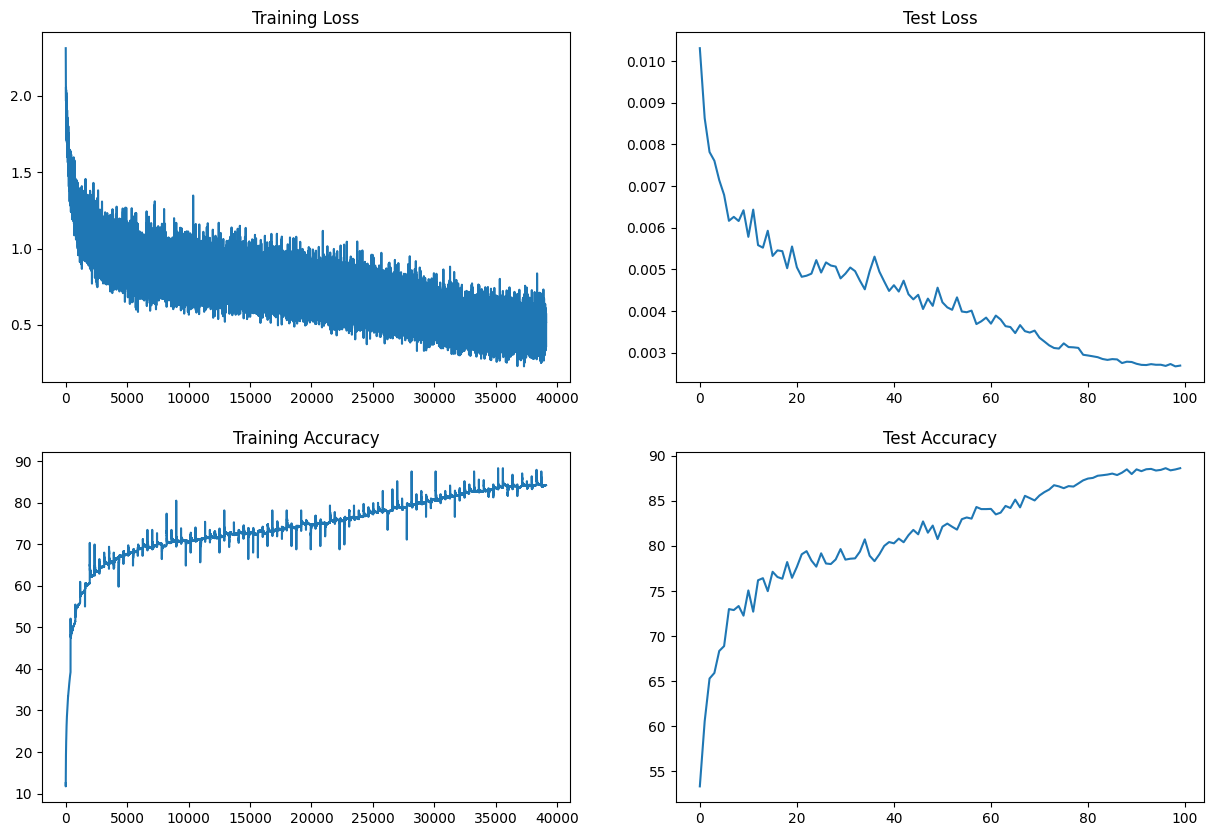

In [11]:
show_accuracy_loss(train_losses, train_acc, test_losses, test_acc)

# Plotting miscalssified images after prediction

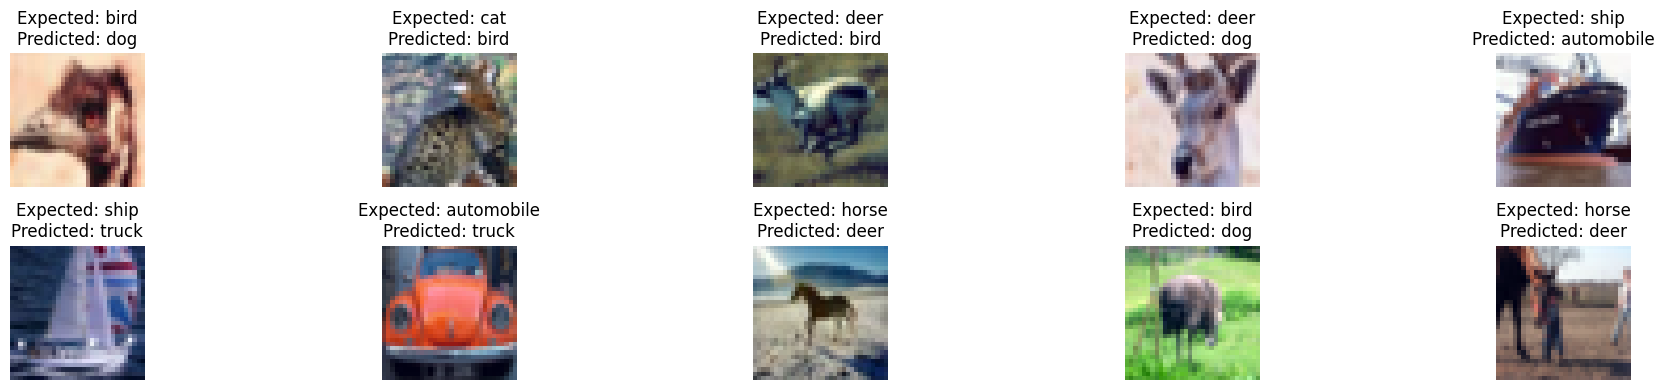

In [12]:
show_misclassified_img(missed_images, missed_labels, missed_predictions, classes)

# Model Graph

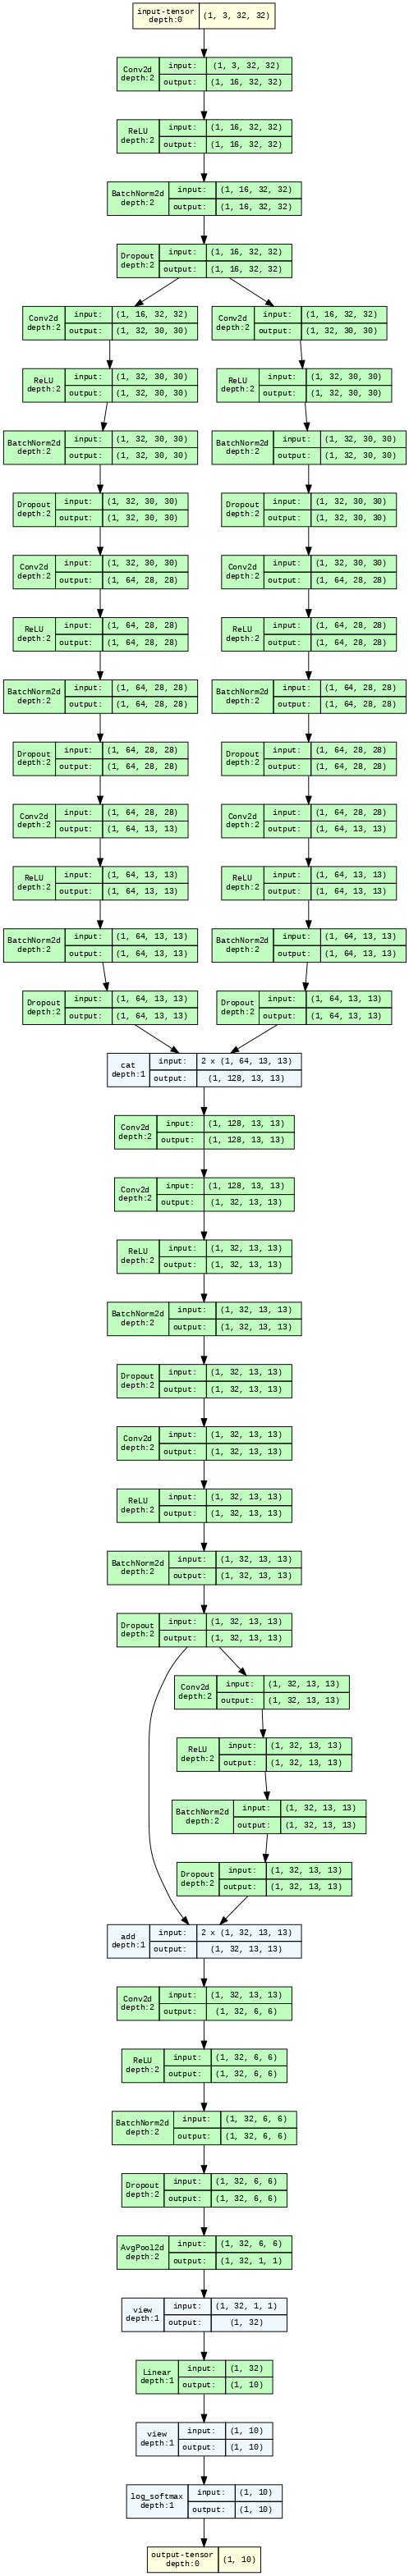

In [13]:
import torchvision
!pip install torchview
from torchview import draw_graph
import graphviz
graphviz.set_jupyter_format('png')
model_graph = draw_graph(Net(), input_size=(1,3,32,32), expand_nested=False)
model_graph.visual_graph

# Class wise Accuracy

In [14]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of airplane : 91 %
Accuracy of automobile : 100 %
Accuracy of  bird : 80 %
Accuracy of   cat : 85 %
Accuracy of  deer : 84 %
Accuracy of   dog : 92 %
Accuracy of  frog : 96 %
Accuracy of horse : 91 %
Accuracy of  ship : 96 %
Accuracy of truck : 96 %
